In [17]:
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import IFrame

plt.style.use('ggplot')
%matplotlib inline
pd.options.display.max_columns=25

### The Play
This play is from the Golden State Warriors - Memphis Grizzlies game on November 2, 2015. The Warriors wound up winning by 50 points, and the third quarter was a showcase of Steph Curry's talents.  In this play from the 3rd quarter, The Grizzlies' (Red) Mike Conley (11) dribbles baseline and kicks out to Matt Barnes (22) behind the 3-point arc who chucks up a brick that gets rebounded by Steph Curry (30). He begins to lead the offensive attack, and quickly three other Warriors are even with him at half court leading to a 4 on 3 break. Curry stops at the 3-point arc, drawing two defenders. From his left hand, he takes the ball behind his back, and the two defenders are convinced he's passing to Andre Igudala (9), but Curry brings the ball to his right hand and threads a pass between defenders to a cutting James Michael McAdoo (20) for the dunk. Watch the play below, or on nba.com [here](http://stats.nba.com/cvp.html?GameID=0021500051&GameEventID=383)

In [21]:
IFrame('http://stats.nba.com/cvp.html?GameID=0021500051&GameEventID=383',width=900,height=400)

In [2]:
IFrame('http://stats.nba.com/movement/#!/?GameID=0021500051&GameEventID=383',width=700,height=400)

In [3]:
url = 'http://stats.nba.com/stats/locations_getmoments/?eventid=383&gameid=0021500051'
response = requests.get(url)
response.json().keys()

[u'moments', u'visitor', u'gamedate', u'gameid', u'home']

# tracking data
Our keys returned are:
* moments 
* visitor
* home 
* gamedate
* gameid

Let's move home, visitor, and moments to their own variables. Then print out gamedate and gameid to see if there is anything else they contain.

In [24]:
home = response.json()["home"]
visitor = response.json()["visitor"]
moments = response.json()["moments"]
print response.json()["gamedate"]
print response.json()["gameid"]

2015-11-02
0021500051


## gamedate & gameid
Nothing of interest in gamedate and gameid (we already know this information just to look up the data).

Let's examine home data

In [25]:
home

{u'abbreviation': u'GSW',
 u'name': u'Golden State Warriors',
 u'players': [{u'firstname': u'Jason',
   u'jersey': u'1',
   u'lastname': u'Thompson',
   u'playerid': 201574,
   u'position': u'F-C'},
  {u'firstname': u'Brandon',
   u'jersey': u'4',
   u'lastname': u'Rush',
   u'playerid': 201575,
   u'position': u'G-F'},
  {u'firstname': u'Marreese',
   u'jersey': u'5',
   u'lastname': u'Speights',
   u'playerid': 201578,
   u'position': u'F-C'},
  {u'firstname': u'Andre',
   u'jersey': u'9',
   u'lastname': u'Iguodala',
   u'playerid': 2738,
   u'position': u'G-F'},
  {u'firstname': u'Klay',
   u'jersey': u'11',
   u'lastname': u'Thompson',
   u'playerid': 202691,
   u'position': u'G'},
  {u'firstname': u'Leandro',
   u'jersey': u'19',
   u'lastname': u'Barbosa',
   u'playerid': 2571,
   u'position': u'G'},
  {u'firstname': u'James Michael',
   u'jersey': u'20',
   u'lastname': u'McAdoo',
   u'playerid': 203949,
   u'position': u'F'},
  {u'firstname': u'Ian',
   u'jersey': u'21',
   u'

## home/visitor data
visitor/home - contains all information about visiting/home team
* teamid - teamid from the API
* name
* abbreviation
* players
  * playerid - playerid from the API
  * firstname
  * lastname
  * jersey - jersey number
  * position - position the player plays (C,F,G,G-F,F-C)

In [26]:
len(moments)

275

In [27]:
moments[0]

[3,
 1446527673002,
 133.3,
 7.66,
 None,
 [[-1, -1, 14.64474, 44.48211, 2.25707],
  [1610612744, 2738, 18.86386, 23.97772, 0.0],
  [1610612744, 201939, 18.87993, 41.50729, 0.0],
  [1610612744, 202691, 5.05095, 29.13419, 0.0],
  [1610612744, 203110, 12.88533, 34.84216, 0.0],
  [1610612744, 203949, 8.88615, 20.38291, 0.0],
  [1610612763, 2440, 27.47547, 8.76582, 0.0],
  [1610612763, 201145, 9.42341, 11.88861, 0.0],
  [1610612763, 201584, 4.219, 16.40298, 0.0],
  [1610612763, 201144, 16.38252, 44.27504, 0.0],
  [1610612763, 201188, 19.68304, 35.52727, 0.0]]]

## moments

moments - contain tracking data. `len(moments)` is number of moments in the eventid (here, 275), usually .04 seconds apart. So for this data, I have about 11 seconds.

a single element in moments contains times and positions of all players and ball. Let's examine the output above:
* the __first__ element `moments[0][0]` is `3`, the __quarter__.
* the __second__ element `moments[0][1]` is `1446527673002`, the __unix timestamp__.
* the __third__ element `moments[0][2]` is `133.3`, and decreases as moments increase. it is the __seconds left in the quarter__
* the __fourth__ element `moments[0][3]` is `7.66`, and decreases as moments increase, then reset to 24. it is __seconds left in the shot clock__
* the __fifth__ element `moments[0][4]` is `None`, and is that value for all elements in moments. I'm not sure what this value is __?__
* the __sixth__ element `moments[0][5]` is a list of lists indicating __teamid, playerid, x, y, z__

To reiterate, the first 5 elements:

In [30]:
moments[0][0:5]

[3, 1446527673002, 133.3, 7.66, None]

`[quarter, unixtime, timeleftgame, timeleftshot, unknown]`
are the labels.

Let's look at the ball (element 0):

In [29]:
moments[0][5][0]

[-1, -1, 14.64474, 44.48211, 2.25707]

`[teamid, playerid, x, y, z]`

the ball has a `teamid=-1` and `playerid=-1`, and appears to be the only tracked element with a z value.

Some have speculated that the z coordinate is the radius of the ball, but let's look at a histogram of values:

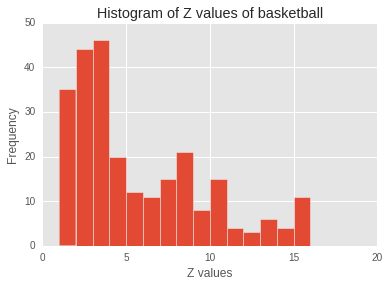

In [37]:
ball_zdat = []
for m in moments:
    ball_zdat.append(m[5][0][4])
plt.hist(ball_zdat,bins=range(1,20))
plt.title('Histogram of Z values of basketball')
plt.xlabel('Z values')
plt.ylabel('Frequency')
plt.show()

Looking at the histogram, it is likely that the z value is the height, in feet, of the basketball from the floor. The most common values are approximately waist height and below. A few values above the height of the rim (10ft.) would indicate a shot or lob pass. Let's plot the x,y,and color it by z.

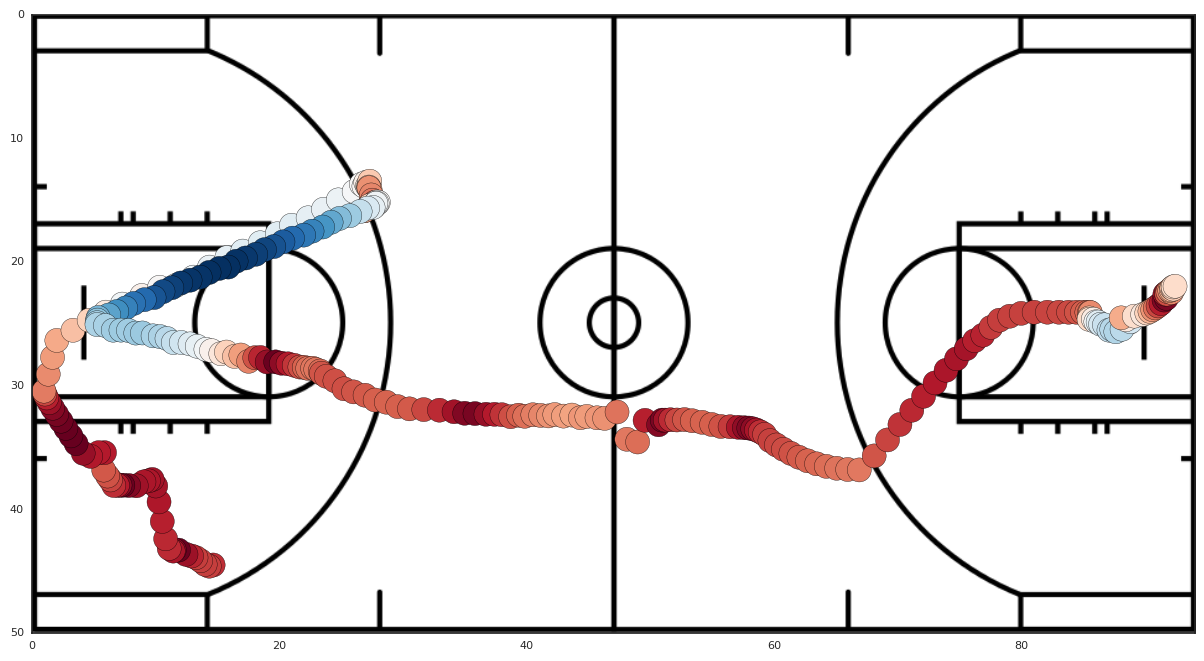

In [69]:
ball_xdat = []
ball_ydat = []
for m in moments:
    ball_xdat.append(m[5][0][2])
    ball_ydat.append(m[5][0][3])

plt.style.use('seaborn-white')
plt.figure(figsize=(15, 11.5))
court = plt.imread("img/fullcourt.png")

plt.scatter(x=ball_xdat,y=ball_ydat,c=ball_zdat,
    cmap=plt.cm.RdBu, s=300, zorder=1)
# xaxis is 0-94 ft. yaxis 50-0 feet (inverted)
plt.style.use('grayscale')
plt.imshow(court, zorder=0, extent=[0,94,50,0])
#plt.imshow(court, zorder=0, extent=[0,94,50,0])
#plt.xlim(0,94)
plt.show()

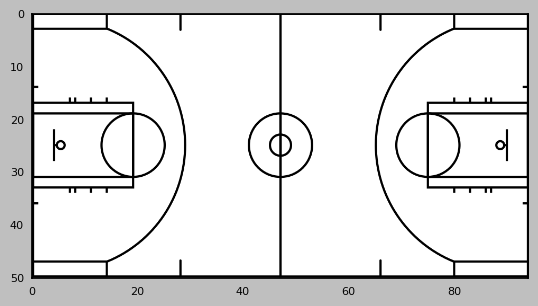

In [67]:
court[10][20]
plt.style.use('grayscale')
plt.imshow(court, extent=[0,94,50,0])

In [44]:
print(plt.style.available)

[u'seaborn-darkgrid', u'seaborn-notebook', u'classic', u'seaborn-ticks', u'grayscale', u'bmh', u'seaborn-talk', u'dark_background', u'ggplot', u'fivethirtyeight', u'seaborn-colorblind', u'seaborn-deep', u'seaborn-whitegrid', u'seaborn-bright', u'seaborn-poster', u'seaborn-muted', u'seaborn-paper', u'seaborn-white', u'seaborn-pastel', u'seaborn-dark', u'seaborn-dark-palette']


## home/visitor
* visitor/home - contains all information about visiting/home team
 * teamid
 * name
 * abbreviation
 * players
   * playerid
   * firstname
   * lastname
   * jersey
   * position

In [16]:
[m[0:5] for m in moments]

[[3, 1446527673002, 133.3, 7.66, None],
 [3, 1446527673042, 133.26, 7.63, None],
 [3, 1446527673081, 133.22, 7.59, None],
 [3, 1446527673122, 133.18, 7.56, None],
 [3, 1446527673161, 133.14, 7.52, None],
 [3, 1446527673202, 133.1, 7.48, None],
 [3, 1446527673241, 133.06, 7.45, None],
 [3, 1446527673282, 133.02, 7.41, None],
 [3, 1446527673322, 132.98, 7.38, None],
 [3, 1446527673362, 132.94, 7.34, None],
 [3, 1446527673402, 132.9, 7.3, None],
 [3, 1446527673441, 132.87, 7.27, None],
 [3, 1446527673482, 132.83, 7.23, None],
 [3, 1446527673521, 132.79, 7.2, None],
 [3, 1446527673562, 132.75, 7.16, None],
 [3, 1446527673601, 132.71, 7.12, None],
 [3, 1446527673642, 132.67, 7.09, None],
 [3, 1446527673682, 132.63, 7.05, None],
 [3, 1446527673722, 132.59, 7.02, None],
 [3, 1446527673762, 132.55, 6.98, None],
 [3, 1446527673801, 132.51, 6.94, None],
 [3, 1446527673842, 132.47, 6.91, None],
 [3, 1446527673881, 132.43, 6.87, None],
 [3, 1446527673922, 132.39, 6.84, None],
 [3, 1446527673961, 1